# Question 1: What are the highest grossing genres of films of the 2010s based on median profit margin?

## Initial Code Setup

In [175]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [176]:
pwd

'C:\\Users\\msf89\\dsc-mod-1-project-v2-1-onl01-dtsc-ft-052620'

In [177]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\imdb.title.ratings.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [178]:
type(csv_files)
d = {}

In [179]:
for file in csv_files:
    d[file] = pd.read_csv(file)

In [180]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [181]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [182]:
csv_files_dict['imdb_title_crew_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  140417 non-null  object
 1   writers    110261 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [183]:
bom_movie_gross_df = csv_files_dict['bom_movie_gross_gz']
imdb_name_basics_df = csv_files_dict['imdb_name_basics_gz']
imdb_title_akas_df = csv_files_dict['imdb_title_akas_gz']
imdb_title_basics_df = csv_files_dict['imdb_title_basics_gz']
imdb_title_crew_df = csv_files_dict['imdb_title_crew_gz']
imdb_title_principals_df = csv_files_dict['imdb_title_principals_gz']
imdb_title_ratings_df = csv_files_dict['imdb_title_ratings_gz']
tmdb_movies_df = csv_files_dict['tmdb_movies_gz']
tn_movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']

## Data Cleaning

### Initial cleaning and analysis 

In [184]:
#creating seperate dataframes for manipulation
imdb_title_practice = imdb_title_basics_df
tn_movie_budgets_practice = tn_movie_budgets_df

In [240]:
imdb_title_practice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [241]:
tn_movie_budgets_practice

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
id,,,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec,2009
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May,2011
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun,2019
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May,2015
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec,2017
...,...,...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Dec,2018
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Apr,1999
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Jul,2005


In [245]:
#Addiing additional columns based on release year and month for later analysis
tn_movie_budgets_practice['release_year'] = tn_movie_budgets_practice['release_date'].astype(str)
tn_movie_budgets_practice['release_year'] = tn_movie_budgets_practice['release_year'].str.strip().str[-4:]
tn_movie_budgets_practice['release_month'] = tn_movie_budgets_practice['release_date'].str.strip().str[:3]

In [246]:
tn_movie_budgets_practice.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
id,,,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec,2009
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May,2011
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun,2019
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May,2015
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec,2017


In [286]:
movie_details_df = pd.merge(imdb_title_practice, tn_movie_budgets_practice,  
                            left_on =  ['primary_title'],
                            right_on= ['movie'], 
                            how = 'left')
movie_details_df.info()
movie_details_df.head(50)
movie_details_df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146353 entries, 0 to 146352
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   primary_title      146353 non-null  object 
 1   original_title     146332 non-null  object 
 2   start_year         146353 non-null  int64  
 3   runtime_minutes    114581 non-null  float64
 4   genres             140940 non-null  object 
 5   release_date       3815 non-null    object 
 6   movie              3815 non-null    object 
 7   production_budget  3815 non-null    object 
 8   domestic_gross     3815 non-null    object 
 9   worldwide_gross    3815 non-null    object 
 10  release_month      3815 non-null    object 
 11  release_year       3815 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 14.5+ MB


Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'release_month', 'release_year'],
      dtype='object')

In [287]:
#Drops rows from dataframe if null values are present in important columns

movie_details_df.dropna(subset=['genres','production_budget','domestic_gross',
                                'worldwide_gross'], axis = 0, inplace = True)
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 20 to 146287
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      3743 non-null   object 
 1   original_title     3743 non-null   object 
 2   start_year         3743 non-null   int64  
 3   runtime_minutes    3309 non-null   float64
 4   genres             3743 non-null   object 
 5   release_date       3743 non-null   object 
 6   movie              3743 non-null   object 
 7   production_budget  3743 non-null   object 
 8   domestic_gross     3743 non-null   object 
 9   worldwide_gross    3743 non-null   object 
 10  release_month      3743 non-null   object 
 11  release_year       3743 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 380.1+ KB


In [288]:
a = movie_details_df.loc[movie_details_df['primary_title'].
                          str.contains('Halloween')]
a

,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
8366,Halloween,Halloween,2018,106.0,"Horror,Thriller","Aug 31, 2007",Halloween,"$15,000,000","$58,269,151","$77,514,401",Aug,2007
8367,Halloween,Halloween,2018,106.0,"Horror,Thriller","Oct 19, 2018",Halloween,"$10,000,000","$159,342,015","$254,900,667",Oct,2018
8368,Halloween,Halloween,2018,106.0,"Horror,Thriller","Oct 17, 1978",Halloween,"$325,000","$47,000,000","$70,000,000",Oct,1978
97253,Goosebumps 2: Haunted Halloween,Goosebumps 2: Haunted Halloween,2018,90.0,"Adventure,Comedy,Family","Oct 12, 2018",Goosebumps 2: Haunted Halloween,"$35,000,000","$46,697,321","$93,291,478",Oct,2018
118290,Halloween II,Halloween II,2010,NaN,Horror,"Oct 30, 1981",Halloween II,"$2,500,000","$25,533,818","$25,533,818",Oct,1981


In [292]:
# Converts release year to int for later comparison

movie_details_df['release_year'] = movie_details_df['release_year'].astype('int64')

In [293]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363 entries, 20 to 146195
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2363 non-null   object 
 1   original_title     2363 non-null   object 
 2   start_year         2363 non-null   int64  
 3   runtime_minutes    2200 non-null   float64
 4   genres             2363 non-null   object 
 5   release_date       2363 non-null   object 
 6   movie              2363 non-null   object 
 7   production_budget  2363 non-null   object 
 8   domestic_gross     2363 non-null   object 
 9   worldwide_gross    2363 non-null   object 
 10  release_month      2363 non-null   object 
 11  release_year       2363 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 240.0+ KB


In [294]:
a = movie_details_df.loc[movie_details_df['primary_title'].
                          str.contains('King Kong')]
a

,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
126722,King Kong,King Kong,2018,NaN,"Action,Adventure","Dec 14, 2005",King Kong,"$207,000,000","$218,080,025","$550,517,357",Dec,2005
126723,King Kong,King Kong,2018,NaN,"Action,Adventure","Dec 17, 1976",King Kong,"$23,000,000","$52,614,445","$90,614,445",Dec,1976
126724,King Kong,King Kong,2018,NaN,"Action,Adventure","Apr 7, 1933",King Kong,"$672,000","$10,000,000","$10,000,650",Apr,1933


In [295]:
movie_details_df = movie_details_df.drop_duplicates(subset=['primary_title',
                                                              'release_date',],
                                                      keep="first",
                                                      inplace=False)
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363 entries, 20 to 146195
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2363 non-null   object 
 1   original_title     2363 non-null   object 
 2   start_year         2363 non-null   int64  
 3   runtime_minutes    2200 non-null   float64
 4   genres             2363 non-null   object 
 5   release_date       2363 non-null   object 
 6   movie              2363 non-null   object 
 7   production_budget  2363 non-null   object 
 8   domestic_gross     2363 non-null   object 
 9   worldwide_gross    2363 non-null   object 
 10  release_month      2363 non-null   object 
 11  release_year       2363 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 240.0+ KB


In [296]:
for col in movie_details_df:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{movie_details_df[col].value_counts()}')

Viewing values in col: primary_title
Top 5 values:
Halloween            3
King Kong            3
Home                 3
Hellboy              2
Fantastic Four       2
                    ..
Gone Girl            1
The Green Inferno    1
Woodlawn             1
MacGruber            1
Noah                 1
Name: primary_title, Length: 2299, dtype: int64
Viewing values in col: original_title
Top 5 values:
Stranded                                    3
Yurt                                        3
King Kong                                   3
Halloween                                   3
Unforgettable                               2
                                           ..
Trolls                                      1
The SpongeBob Movie: Sponge Out of Water    1
Akira                                       1
Reality Show                                1
Noah                                        1
Name: original_title, Length: 2296, dtype: int64
Viewing values in col: start_year
Top 5 v

### Data type conversion

In [298]:
def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int64')
    return df

In [301]:
money_cols = ['production_budget','domestic_gross','worldwide_gross']

for col in money_cols:
    movie_details_df = convert_amt_to_int(movie_details_df, col)

AttributeError: Can only use .str accessor with string values!

In [302]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363 entries, 20 to 146195
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2363 non-null   object 
 1   original_title     2363 non-null   object 
 2   start_year         2363 non-null   int64  
 3   runtime_minutes    2200 non-null   float64
 4   genres             2363 non-null   object 
 5   release_date       2363 non-null   object 
 6   movie              2363 non-null   object 
 7   production_budget  2363 non-null   int64  
 8   domestic_gross     2363 non-null   int64  
 9   worldwide_gross    2363 non-null   int64  
 10  release_month      2363 non-null   object 
 11  release_year       2363 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 240.0+ KB


In [303]:
movie_details_df['total_gross'] = movie_details_df['domestic_gross'] + movie_details_df['worldwide_gross']
movie_details_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,total_gross
20,Foodfight!,Foodfight!,2012,91.0,"[Action, Animation, Comedy]","Dec 31, 2012",Foodfight!,45000000,0,73706,Dec,2012,73706
33,Mortal Kombat,Mortal Kombat,2021,NaN,"[Action, Adventure, Fantasy]","Aug 18, 1995",Mortal Kombat,20000000,70433227,122133227,Aug,1995,192566454
48,On the Road,On the Road,2012,124.0,"[Adventure, Drama, Romance]","Mar 22, 2013",On the Road,25000000,720828,9313302,Mar,2013,10034130
54,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]","Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,Dec,2013,246098021
58,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]","Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,Sep,2014,88126272


In [305]:
movie_details_df['net_profit'] = movie_details_df['total_gross'] - movie_details_df['production_budget']
movie_details_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,total_gross,net_profit
20,Foodfight!,Foodfight!,2012,91.0,"[Action, Animation, Comedy]","Dec 31, 2012",Foodfight!,45000000,0,73706,Dec,2012,73706,-44926294
33,Mortal Kombat,Mortal Kombat,2021,NaN,"[Action, Adventure, Fantasy]","Aug 18, 1995",Mortal Kombat,20000000,70433227,122133227,Aug,1995,192566454,172566454
48,On the Road,On the Road,2012,124.0,"[Adventure, Drama, Romance]","Mar 22, 2013",On the Road,25000000,720828,9313302,Mar,2013,10034130,-14965870
54,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]","Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,Dec,2013,246098021,155098021
58,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]","Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,Sep,2014,88126272,60126272


In [306]:
movie_details_df['net_profit_margin'] = round(((movie_details_df['net_profit'] / 
                                                movie_details_df['production_budget']) * 100),2)
movie_details_df.head(5)

,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,total_gross,net_profit,net_profit_margin
20,Foodfight!,Foodfight!,2012,91.0,"[Action, Animation, Comedy]","Dec 31, 2012",Foodfight!,45000000,0,73706,Dec,2012,73706,-44926294,-99.84
33,Mortal Kombat,Mortal Kombat,2021,NaN,"[Action, Adventure, Fantasy]","Aug 18, 1995",Mortal Kombat,20000000,70433227,122133227,Aug,1995,192566454,172566454,862.83
48,On the Road,On the Road,2012,124.0,"[Adventure, Drama, Romance]","Mar 22, 2013",On the Road,25000000,720828,9313302,Mar,2013,10034130,-14965870,-59.86
54,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]","Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,Dec,2013,246098021,155098021,170.44
58,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]","Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,Sep,2014,88126272,60126272,214.74


### Removing unwanted columns

In [308]:
movie_details_df = movie_details_df.drop(columns = {'original_title','start_year', 'runtime_minutes','movie'})
movie_details_df.head()

,primary_title,genres,release_date,production_budget,domestic_gross,worldwide_gross,release_month,release_year,total_gross,net_profit,net_profit_margin
20,Foodfight!,"[Action, Animation, Comedy]","Dec 31, 2012",45000000,0,73706,Dec,2012,73706,-44926294,-99.84
33,Mortal Kombat,"[Action, Adventure, Fantasy]","Aug 18, 1995",20000000,70433227,122133227,Aug,1995,192566454,172566454,862.83
48,On the Road,"[Adventure, Drama, Romance]","Mar 22, 2013",25000000,720828,9313302,Mar,2013,10034130,-14965870,-59.86
54,The Secret Life of Walter Mitty,"[Adventure, Comedy, Drama]","Dec 25, 2013",91000000,58236838,187861183,Dec,2013,246098021,155098021,170.44
58,A Walk Among the Tombstones,"[Action, Crime, Drama]","Sep 19, 2014",28000000,26017685,62108587,Sep,2014,88126272,60126272,214.74


### Splitting into genres

In [297]:
movie_details_df['genres'] = movie_details_df['genres'].apply(lambda x: x.split(",") if x else x)
movie_details_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
20,Foodfight!,Foodfight!,2012,91.0,"[Action, Animation, Comedy]","Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",Dec,2012
33,Mortal Kombat,Mortal Kombat,2021,NaN,"[Action, Adventure, Fantasy]","Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227",Aug,1995
48,On the Road,On the Road,2012,124.0,"[Adventure, Drama, Romance]","Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",Mar,2013
54,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]","Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",Dec,2013
58,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]","Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",Sep,2014


In [309]:
all_genres = set()
for genres in movie_details_df['genres']:
    if genres:
        all_genres.update(genres)

In [310]:
for genre in all_genres:
    movie_details_df[genre] = np.zeros(shape=movie_details_df.shape[0])
                                
movie_details_df.head(15)

,primary_title,genres,release_date,production_budget,domestic_gross,worldwide_gross,release_month,release_year,total_gross,net_profit,...,Western,Animation,Family,Action,History,War,News,Comedy,Crime,Horror
20,Foodfight!,"[Action, Animation, Comedy]","Dec 31, 2012",45000000,0,73706,Dec,2012,73706,-44926294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,Mortal Kombat,"[Action, Adventure, Fantasy]","Aug 18, 1995",20000000,70433227,122133227,Aug,1995,192566454,172566454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,On the Road,"[Adventure, Drama, Romance]","Mar 22, 2013",25000000,720828,9313302,Mar,2013,10034130,-14965870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,The Secret Life of Walter Mitty,"[Adventure, Comedy, Drama]","Dec 25, 2013",91000000,58236838,187861183,Dec,2013,246098021,155098021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,A Walk Among the Tombstones,"[Action, Crime, Drama]","Sep 19, 2014",28000000,26017685,62108587,Sep,2014,88126272,60126272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,Jurassic World,"[Action, Adventure, Sci-Fi]","Jun 12, 2015",215000000,652270625,1648854864,Jun,2015,2301125489,2086125489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,The Rum Diary,"[Comedy, Drama]","Oct 28, 2011",45000000,13109815,21544732,Oct,2011,34654547,-10345453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,The Three Stooges,"[Comedy, Family]","Apr 13, 2012",30000000,44338224,54052249,Apr,2012,98390473,68390473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,Anderson's Cross,"[Comedy, Drama, Romance]","Dec 31, 2010",300000,0,0,Dec,2010,0,-300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,Tangled,"[Adventure, Animation, Comedy]","Nov 24, 2010",260000000,200821936,586477240,Nov,2010,787299176,527299176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [311]:
for index, row in movie_details_df.iterrows():
    if row['genres']:
        for genre in row['genres']:
            movie_details_df.loc[index, genre] = 1

movie_details_df.head(15)

,primary_title,genres,release_date,production_budget,domestic_gross,worldwide_gross,release_month,release_year,total_gross,net_profit,...,Western,Animation,Family,Action,History,War,News,Comedy,Crime,Horror
20,Foodfight!,"[Action, Animation, Comedy]","Dec 31, 2012",45000000,0,73706,Dec,2012,73706,-44926294,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
33,Mortal Kombat,"[Action, Adventure, Fantasy]","Aug 18, 1995",20000000,70433227,122133227,Aug,1995,192566454,172566454,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
48,On the Road,"[Adventure, Drama, Romance]","Mar 22, 2013",25000000,720828,9313302,Mar,2013,10034130,-14965870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,The Secret Life of Walter Mitty,"[Adventure, Comedy, Drama]","Dec 25, 2013",91000000,58236838,187861183,Dec,2013,246098021,155098021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58,A Walk Among the Tombstones,"[Action, Crime, Drama]","Sep 19, 2014",28000000,26017685,62108587,Sep,2014,88126272,60126272,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
60,Jurassic World,"[Action, Adventure, Sci-Fi]","Jun 12, 2015",215000000,652270625,1648854864,Jun,2015,2301125489,2086125489,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
62,The Rum Diary,"[Comedy, Drama]","Oct 28, 2011",45000000,13109815,21544732,Oct,2011,34654547,-10345453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67,The Three Stooges,"[Comedy, Family]","Apr 13, 2012",30000000,44338224,54052249,Apr,2012,98390473,68390473,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
69,Anderson's Cross,"[Comedy, Drama, Romance]","Dec 31, 2010",300000,0,0,Dec,2010,0,-300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
71,Tangled,"[Adventure, Animation, Comedy]","Nov 24, 2010",260000000,200821936,586477240,Nov,2010,787299176,527299176,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [312]:
movie_details_df.columns

Index(['primary_title', 'genres', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'release_month', 'release_year',
       'total_gross', 'net_profit', 'net_profit_margin', 'Documentary',
       'Adventure', 'Fantasy', 'Mystery', 'Drama', 'Music', 'Musical',
       'Sci-Fi', 'Sport', 'Romance', 'Thriller', 'Biography', 'Western',
       'Animation', 'Family', 'Action', 'History', 'War', 'News', 'Comedy',
       'Crime', 'Horror'],
      dtype='object')

In [316]:
for col in movie_details_df:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{movie_details_df[col].value_counts()}')

Viewing values in col: primary_title
Top 5 values:
Halloween            3
King Kong            3
Home                 3
Hellboy              2
Fantastic Four       2
                    ..
Gone Girl            1
The Green Inferno    1
Woodlawn             1
MacGruber            1
Noah                 1
Name: primary_title, Length: 2299, dtype: int64
Viewing values in col: genres
Top 5 values:
[Drama]                           197
[Documentary]                     100
[Comedy]                           85
[Comedy, Drama]                    75
[Adventure, Animation, Comedy]     68
                                 ... 
[Comedy, Drama, Thriller]           1
[Drama, Fantasy, Music]             1
[Adventure, Crime, Thriller]        1
[Action, Horror, Mystery]           1
[Comedy, Sport]                     1
Name: genres, Length: 294, dtype: int64
Viewing values in col: release_date
Top 5 values:
Dec 31, 2014    18
Dec 31, 2015    14
Dec 31, 2013    11
Dec 31, 2012     9
Oct 8, 2010      8
 

### Removing unwanted rows from our data

In [340]:
# Determining which indices contain no information for production budget 
# or movie details for removal

indexBudget = movie_details_df[(movie_details_df['production_budget'] == 0)].index
indexGross = movie_details_df[(movie_details_df['total_gross'] == 0)].index

In [342]:
movie_details_df.drop(indexBudget, inplace=True)
movie_details_df.drop(indexGross, inplace=True)

for col in movie_details_df:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{movie_details_df[col].value_counts()}')

Viewing values in col: primary_title
Top 5 values:
Halloween                3
King Kong                3
Carrie                   2
The Island               2
The Karate Kid           2
                        ..
Carnage                  1
Letters to God           1
The Edge of Seventeen    1
Annabelle: Creation      1
Noah                     1
Name: primary_title, Length: 2084, dtype: int64
Viewing values in col: genres
Top 5 values:
[Drama]                           177
[Documentary]                      87
[Comedy]                           74
[Comedy, Drama]                    68
[Adventure, Animation, Comedy]     67
                                 ... 
[Action, Biography, Comedy]         1
[Crime, Drama, Musical]             1
[Adventure, Crime, Drama]           1
[Action, Fantasy, War]              1
[Action, Sport]                     1
Name: genres, Length: 286, dtype: int64
Viewing values in col: release_date
Top 5 values:
Oct 17, 2014    8
Oct 10, 2014    8
Oct 8, 2010     

In [351]:
movie_details_df_edited = movie_details_df[(movie_details_df['release_year'] > 2009) & (movie_details_df['release_year'] < 2020)]
movie_details_df_edited.head()

,primary_title,genres,release_date,production_budget,domestic_gross,worldwide_gross,release_month,release_year,total_gross,net_profit,...,Western,Animation,Family,Action,History,War,News,Comedy,Crime,Horror
20,Foodfight!,"[Action, Animation, Comedy]","Dec 31, 2012",45000000,0,73706,Dec,2012,73706,-44926294,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
48,On the Road,"[Adventure, Drama, Romance]","Mar 22, 2013",25000000,720828,9313302,Mar,2013,10034130,-14965870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,The Secret Life of Walter Mitty,"[Adventure, Comedy, Drama]","Dec 25, 2013",91000000,58236838,187861183,Dec,2013,246098021,155098021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58,A Walk Among the Tombstones,"[Action, Crime, Drama]","Sep 19, 2014",28000000,26017685,62108587,Sep,2014,88126272,60126272,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
60,Jurassic World,"[Action, Adventure, Sci-Fi]","Jun 12, 2015",215000000,652270625,1648854864,Jun,2015,2301125489,2086125489,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Evaluating by Genre

In [352]:
cols = list(movie_details_df_edited.columns)
cols

['primary_title',
 'genres',
 'release_date',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'release_month',
 'release_year',
 'total_gross',
 'net_profit',
 'net_profit_margin',
 'Documentary',
 'Adventure',
 'Fantasy',
 'Mystery',
 'Drama',
 'Music',
 'Musical',
 'Sci-Fi',
 'Sport',
 'Romance',
 'Thriller',
 'Biography',
 'Western',
 'Animation',
 'Family',
 'Action',
 'History',
 'War',
 'News',
 'Comedy',
 'Crime',
 'Horror']

In [366]:
genre_cols = cols[11:]
#getting a dict with genre counts

genre_count = {}
for col in genre_cols:
    count = np.sum(movie_details_df_edited[col] == 1).sum() 
    genre_count[col] = count
genre_count

{'Documentary': 67,
 'Adventure': 358,
 'Fantasy': 129,
 'Mystery': 130,
 'Drama': 802,
 'Music': 56,
 'Musical': 8,
 'Sci-Fi': 135,
 'Sport': 32,
 'Romance': 216,
 'Thriller': 261,
 'Biography': 146,
 'Western': 10,
 'Animation': 104,
 'Family': 90,
 'Action': 437,
 'History': 53,
 'War': 22,
 'News': 0,
 'Comedy': 539,
 'Crime': 240,
 'Horror': 180}

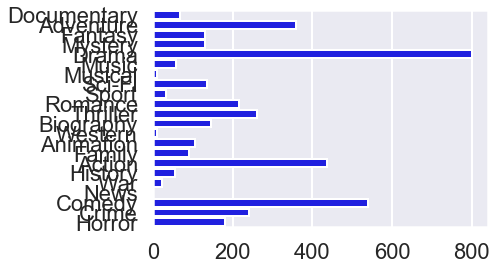

In [372]:
keys = list(genre_count.keys())
values = list(genre_count.values())
sns.barplot(y = keys, x = values, color = 'blue')

In [370]:
genre_median = {}
for col in genre_cols:
    df_practice = movie_details_df_edited.loc[movie_details_df_edited[col] == 1.0] 
    genre_median[col] = round(df_practice['net_profit_margin'].median(),2)

genre_df = pd.DataFrame(list(genre_median.items()), columns = ['Genres','Median Profit Margin'])
genre_df = genre_df.sort_values('Median Profit Margin', ascending=False)
top10 = genre_df.head(10)
top10

,Genres,Median Profit Margin
3,Mystery,332.99
13,Animation,289.87
21,Horror,282.73
7,Sci-Fi,277.34
1,Adventure,254.69
19,Comedy,247.29
10,Thriller,245.82
9,Romance,222.66
14,Family,215.98
5,Music,210.40


## Data Visualization Setup

[Text(0, 0, 'Mystery'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Music')]

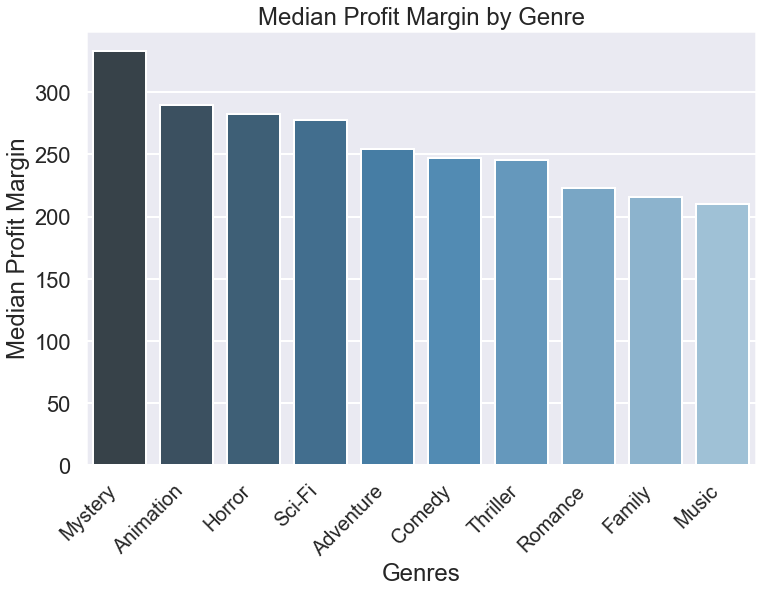

In [371]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
graph = sns.barplot(x='Genres', y="Median Profit Margin", data=top10, 
                    palette="Blues_d")
sns.set_context("poster")
graph.set_title('Median Profit Margin by Genre')
graph.set_xticklabels(graph.get_xticklabels(), rotation=45 ,
                      fontweight='light',fontsize='small',
                      horizontalalignment='right')


# Question 2: What is the best time of year to release particular genres of film?

In [394]:
top_genres = ['Mystery','Animation', 'Horror', 'Sci-Fi', 'Adventure']

mystery_movies = movie_details_df_edited[movie_details_df_edited['Mystery'] == 1]
animation_movies = movie_details_df_edited[movie_details_df_edited['Animation'] == 1]
horror_movies = movie_details_df_edited[movie_details_df_edited['Horror'] == 1]
scifi_movies = movie_details_df_edited[movie_details_df_edited['Sci-Fi'] == 1]
adventure_movies = movie_details_df_edited[movie_details_df_edited['Adventure'] == 1]

hor_months = horror_movies['release_month'].value_counts()
anim_months = animation_movies['release_month'].value_counts()
two = pd.merge(hor_months,anim_months, on = '')

#grouped_by_month_mystery = mystery_movies.groupby('release_month').count()
#print(grouped_by_month)

Nov    16
Jun    12
Jul    12
Dec    11
Mar    11
Sep     9
Feb     8
Apr     7
Aug     5
May     5
Jan     5
Oct     3
Name: release_month, dtype: int64